In [213]:
import pandas as pd 
import gspread 
from oauth2client.service_account import ServiceAccountCredentials
from pandas.io.json import json_normalize
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('./fifth-tangent-301922-e9b71e669448.json', scope)
gc = gspread.authorize(credentials)

In [214]:
spreadsheet_key = '1wdWz6yrComG-szOu6AbSuo3t4yvAPHHIBIEU-N7_egU'
book = gc.open_by_key(spreadsheet_key)
worksheet = book.worksheet("Sheet1")
table = worksheet.get_all_values()

In [215]:
df_incomplete = pd.DataFrame(table[2:], columns=table[0])
df_incomplete.head()

,SampleID,ManholeID,Downstream from,Area,"Building(s) (Public bathrooms underlined, non-residential buildings bold)",# residents
0,AS009,C1M031,,Revelle,"Blake, Argo, Urey Hall",199
1,AS010,C1M057,"C1M059, C1M060",Muir,"Tamarack, Tuolumne T East, McGill Hall, Mandle...",180
2,AS064,C1M059,C1M060,Muir,"Tuolumne S, Tuolumne T House West, Tuolumne T ...",432
3,AS014,C1M060,,Muir,"Tenaya, Roots and Pines, Extended Studies and ...",174
4,AS005,C1M161,,NTPLLN,Catalyst,234


## Graph Data Structure
### Dictionary of Dictionary, directed graph(indicated by downstream)

## Clean Messy Data

In [217]:
edges = [h.replace("and",",") for h in df_incomplete["Downstream from"]]
edges = [h.split(",") for h in edges]
edges = [[elem.strip() for elem in h] for h in edges]
edges

[[''],
 ['C1M059', 'C1M060'],
 ['C1M060'],
 [''],
 [''],
 [''],
 [''],
 ['C3M042', 'C3M041'],
 ['C3M042'],
 [''],
 ['C3M097'],
 [''],
 ['C3M159', 'C3M158', 'C3M152', 'C3M150'],
 ['C3M158', 'C3M152'],
 ['C3M158'],
 [''],
 [''],
 ['C6M025'],
 [''],
 [''],
 ['C6M030'],
 ['C6M030', 'C6M031', ''],
 ['C6M030', 'C6M031', 'C6M033'],
 [''],
 ['C6M041', 'C6M043'],
 [''],
 [''],
 ['C6M045', 'C6M043', 'C6M042', 'C6M041'],
 ['C6M046',
  'C6M045',
  'C6M043',
  'C6M042',
  'C6M041',
  'C6M034',
  'C6M030',
  'C6M031',
  'C6M033'],
 ['C6M047',
  'C6M046',
  'C6M045',
  'C6M043',
  'C6M042',
  'C6M041',
  'C6M034',
  'C6M030',
  'C6M031',
  'C6M033'],
 [''],
 ['C6M072'],
 ['C6M092'],
 [''],
 ['C6M094', 'C6M095', 'C6M097', 'C6M098'],
 ['C6M097', 'C6M098'],
 ['C6M098'],
 [''],
 ['C7M012', 'C7M008'],
 ['C7M012'],
 [''],
 ['C7M024', 'C7M025', 'C7M027', 'C7M034', 'C7M030', 'C7M031', 'C7M032', ''],
 [''],
 ['C7M024'],
 [''],
 ['C7M032', 'C7M031'],
 ['C7M032'],
 [''],
 ['s2M016', 's2M017'],
 [''],
 [''],
 ['

In [220]:
df_incomplete["Downstream from"] = edges
df_incomplete.head()

,SampleID,ManholeID,Downstream from,Area,"Building(s) (Public bathrooms underlined, non-residential buildings bold)",# residents
0,AS009,C1M031,[],Revelle,"Blake, Argo, Urey Hall",199
1,AS010,C1M057,"[C1M059, C1M060]",Muir,"Tamarack, Tuolumne T East, McGill Hall, Mandle...",180
2,AS064,C1M059,[C1M060],Muir,"Tuolumne S, Tuolumne T House West, Tuolumne T ...",432
3,AS014,C1M060,[],Muir,"Tenaya, Roots and Pines, Extended Studies and ...",174
4,AS005,C1M161,[],NTPLLN,Catalyst,234


### Edge Case

In [218]:
"C7M034" not in df_incomplete["ManholeID"]

True

### Assumption: SampleID and MandholeID are unique

## Build Graph

In [410]:
from collections import defaultdict
manhole_graph = defaultdict(dict)
for index, row in df_incomplete.iterrows():
    for elem in row["Downstream from"]:
        if elem != "":
            if elem not in manhole_graph:
                manhole_graph[elem]["to"] = set()
            manhole_graph[elem]["to"].add(row["ManholeID"])
manhole_graph

defaultdict(dict,
            {'C1M059': {'to': {'C1M057'}},
             'C1M060': {'to': {'C1M057', 'C1M059'}},
             'C3M042': {'to': {'C3M039', 'C3M041'}},
             'C3M041': {'to': {'C3M039'}},
             'C3M097': {'to': {'C3M097'}},
             'C3M159': {'to': {'C3M149'}},
             'C3M158': {'to': {'C3M149', 'C3M150', 'C3M152'}},
             'C3M152': {'to': {'C3M149', 'C3M150'}},
             'C3M150': {'to': {'C3M149'}},
             'C6M025': {'to': {'C6M021'}},
             'C6M030': {'to': {'C6M031',
               'C6M033',
               'C6M034',
               'C6M047',
               'C6M049'}},
             'C6M031': {'to': {'C6M033', 'C6M034', 'C6M047', 'C6M049'}},
             'C6M033': {'to': {'C6M034', 'C6M047', 'C6M049'}},
             'C6M041': {'to': {'C6M042', 'C6M046', 'C6M047', 'C6M049'}},
             'C6M043': {'to': {'C6M042', 'C6M046', 'C6M047', 'C6M049'}},
             'C6M045': {'to': {'C6M046', 'C6M047', 'C6M049'}},
             '

## Exciting Part: Potential Detection Search

In [247]:
def searchPotentialManHole(manhole_id,graph,pot_affected): #DFS get connected component
    if manhole_id in pot_affected or manhole_id not in graph: # if already visited or there is no entry in the ManholeID column
        return
    pot_affected.add(manhole_id)
    for node in graph[manhole_id]["to"]:
        searchPotentialManHole(node,graph,pot_affected)
component = set()
searchPotentialManHole('C7M017',manhole_graph,component)
component
            

{'C7M017', 'C7M024', 'C7M025', 'C7M027', 'C7M030', 'C7M031', 'C7M032'}

In [248]:
def getAllConnectedComponents(graph): #DFS get all connected components
    component_idx = 0
    components = defaultdict(set)
    for node in graph:
        if node not in components[component_idx]:
            searchPotentialManHole(node,graph,components[component_idx])
            component_idx += 1
    return components

In [249]:
getAllConnectedComponents(manhole_graph)

KeyError: 'to'

In [42]:
manhole_graph

defaultdict(dict,
            {'C1M031': {'to': set(), 'SampleID': 'AS009'},
             'C1M057': {'to': {'C1M059', 'C1M060'}, 'SampleID': 'AS010'},
             'C1M059': {'to': {'C1M060'}, 'SampleID': 'AS064'},
             'C1M060': {'to': set(), 'SampleID': 'AS014'},
             'C1M161': {'to': set(), 'SampleID': 'AS005'},
             'C2M015': {'to': set(), 'SampleID': 'AS012'},
             'C3M022': {'to': set(), 'SampleID': 'AS059'},
             'C3M039': {'to': {'C3M041', 'C3M042'}, 'SampleID': 'AS051'},
             'C3M041': {'to': {'C3M042'}, 'SampleID': 'AS052'},
             'C3M042': {'to': set(), 'SampleID': 'AS053'},
             'C3M097': {'to': {'C3M097'}, 'SampleID': 'AS057'},
             'C3M099': {'to': set(), 'SampleID': 'AS058'},
             'C3M149': {'to': {'C3M150', 'C3M152', 'C3M158', 'C3M159'},
              'SampleID': 'AS029'},
             'C3M150': {'to': {'C3M152', 'C3M158'}, 'SampleID': 'AS061'},
             'C3M152': {'to': {'C3M158'}, 'Samp

## Exciting Part: Graph Visualization

## Step1: create dict of set to conform to networkx format

In [91]:
! pip install pygraphviz

    100% |████████████████████████████████| 122kB 3.4MB/s ta 0:00:01
  Stored in directory: /Users/yijianzong/Library/Caches/pip/wheels/32/59/00/14934a4292c4359eeabcdbf90f33d309b55d0f1be8a1262523
Successfully built pygraphviz
You are using pip version 19.0.1, however version 21.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [100]:
import networkx as nx
import matplotlib.pyplot as plt
d = {key:value["to"]for key,value in manhole_graph.items()}  # dict-of-dicts single edge (0,1)
G = nx.DiGraph(d)
G.graph['edge'] = {'arrowsize': '0.8', 'splines': 
'curved','shape':'circle'}

In [101]:
D = nx.nx_agraph.to_agraph(G)

In [118]:
D.layout('dot')
D.draw('graph.png') 

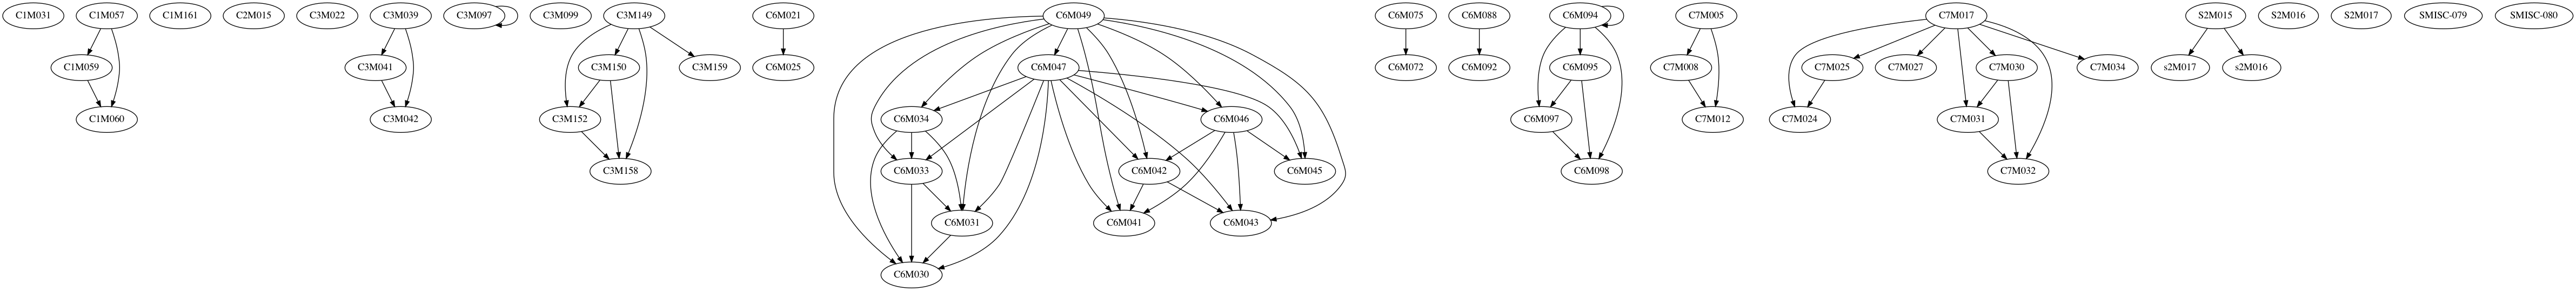

In [119]:
from IPython.display import Image
Image(filename='graph.png',width=1000,height=300) 

## Use shp file

## Todo: data imputation & Unit Tests

In [88]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.read_shp('network/Sewer_Pipe.shp') 

In [89]:
G.edges()

OutEdgeView([((6258198.488400668, 1900145.8768579215), (6258125.227392346, 1900113.9868298322)), ((6258125.227392346, 1900113.9868298322), (6258109.673289597, 1899935.3621870875)), ((6258151.93239142, 1899927.5544599295), (6258148.384170175, 1899833.278729841)), ((6258148.384170175, 1899833.278729841), (6258148.365797505, 1899738.8875144273)), ((6258109.673289597, 1899935.3621870875), (6258101.248109594, 1899772.0892196745)), ((6258101.248109594, 1899772.0892196745), (6258148.365797505, 1899738.8875144273)), ((6258148.365797505, 1899738.8875144273), (6258148.347424835, 1899645.4027932584)), ((6257772.18511942, 1899411.261201173), (6257807.037083834, 1899411.2546395063)), ((6257772.238268927, 1899429.1512572616), (6257807.055128425, 1899429.1450236738)), ((6258119.0121816695, 1899328.7082166672), (6258268.352762252, 1899030.2202965915)), ((6258119.0121816695, 1899328.7082166672), (6258119.017102927, 1899328.6980460882)), ((6258268.352762252, 1899030.2202965915), (6258279.303199679, 1899

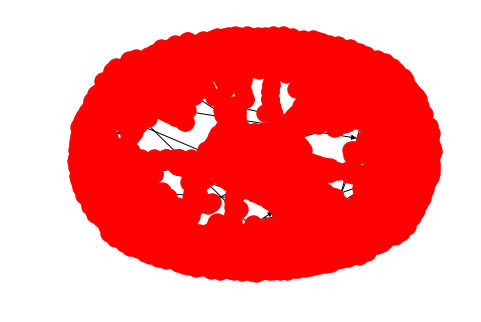

In [90]:
pos=nx.spring_layout(G)
nx.draw(G,pos,edge_cmap=plt.cm.Reds)

In [ ]:
sewerAG = nx.nx_agraph.to_agraph(G)

In [6]:
sewerAG.layout()
sewerAG.draw("sewer.png")

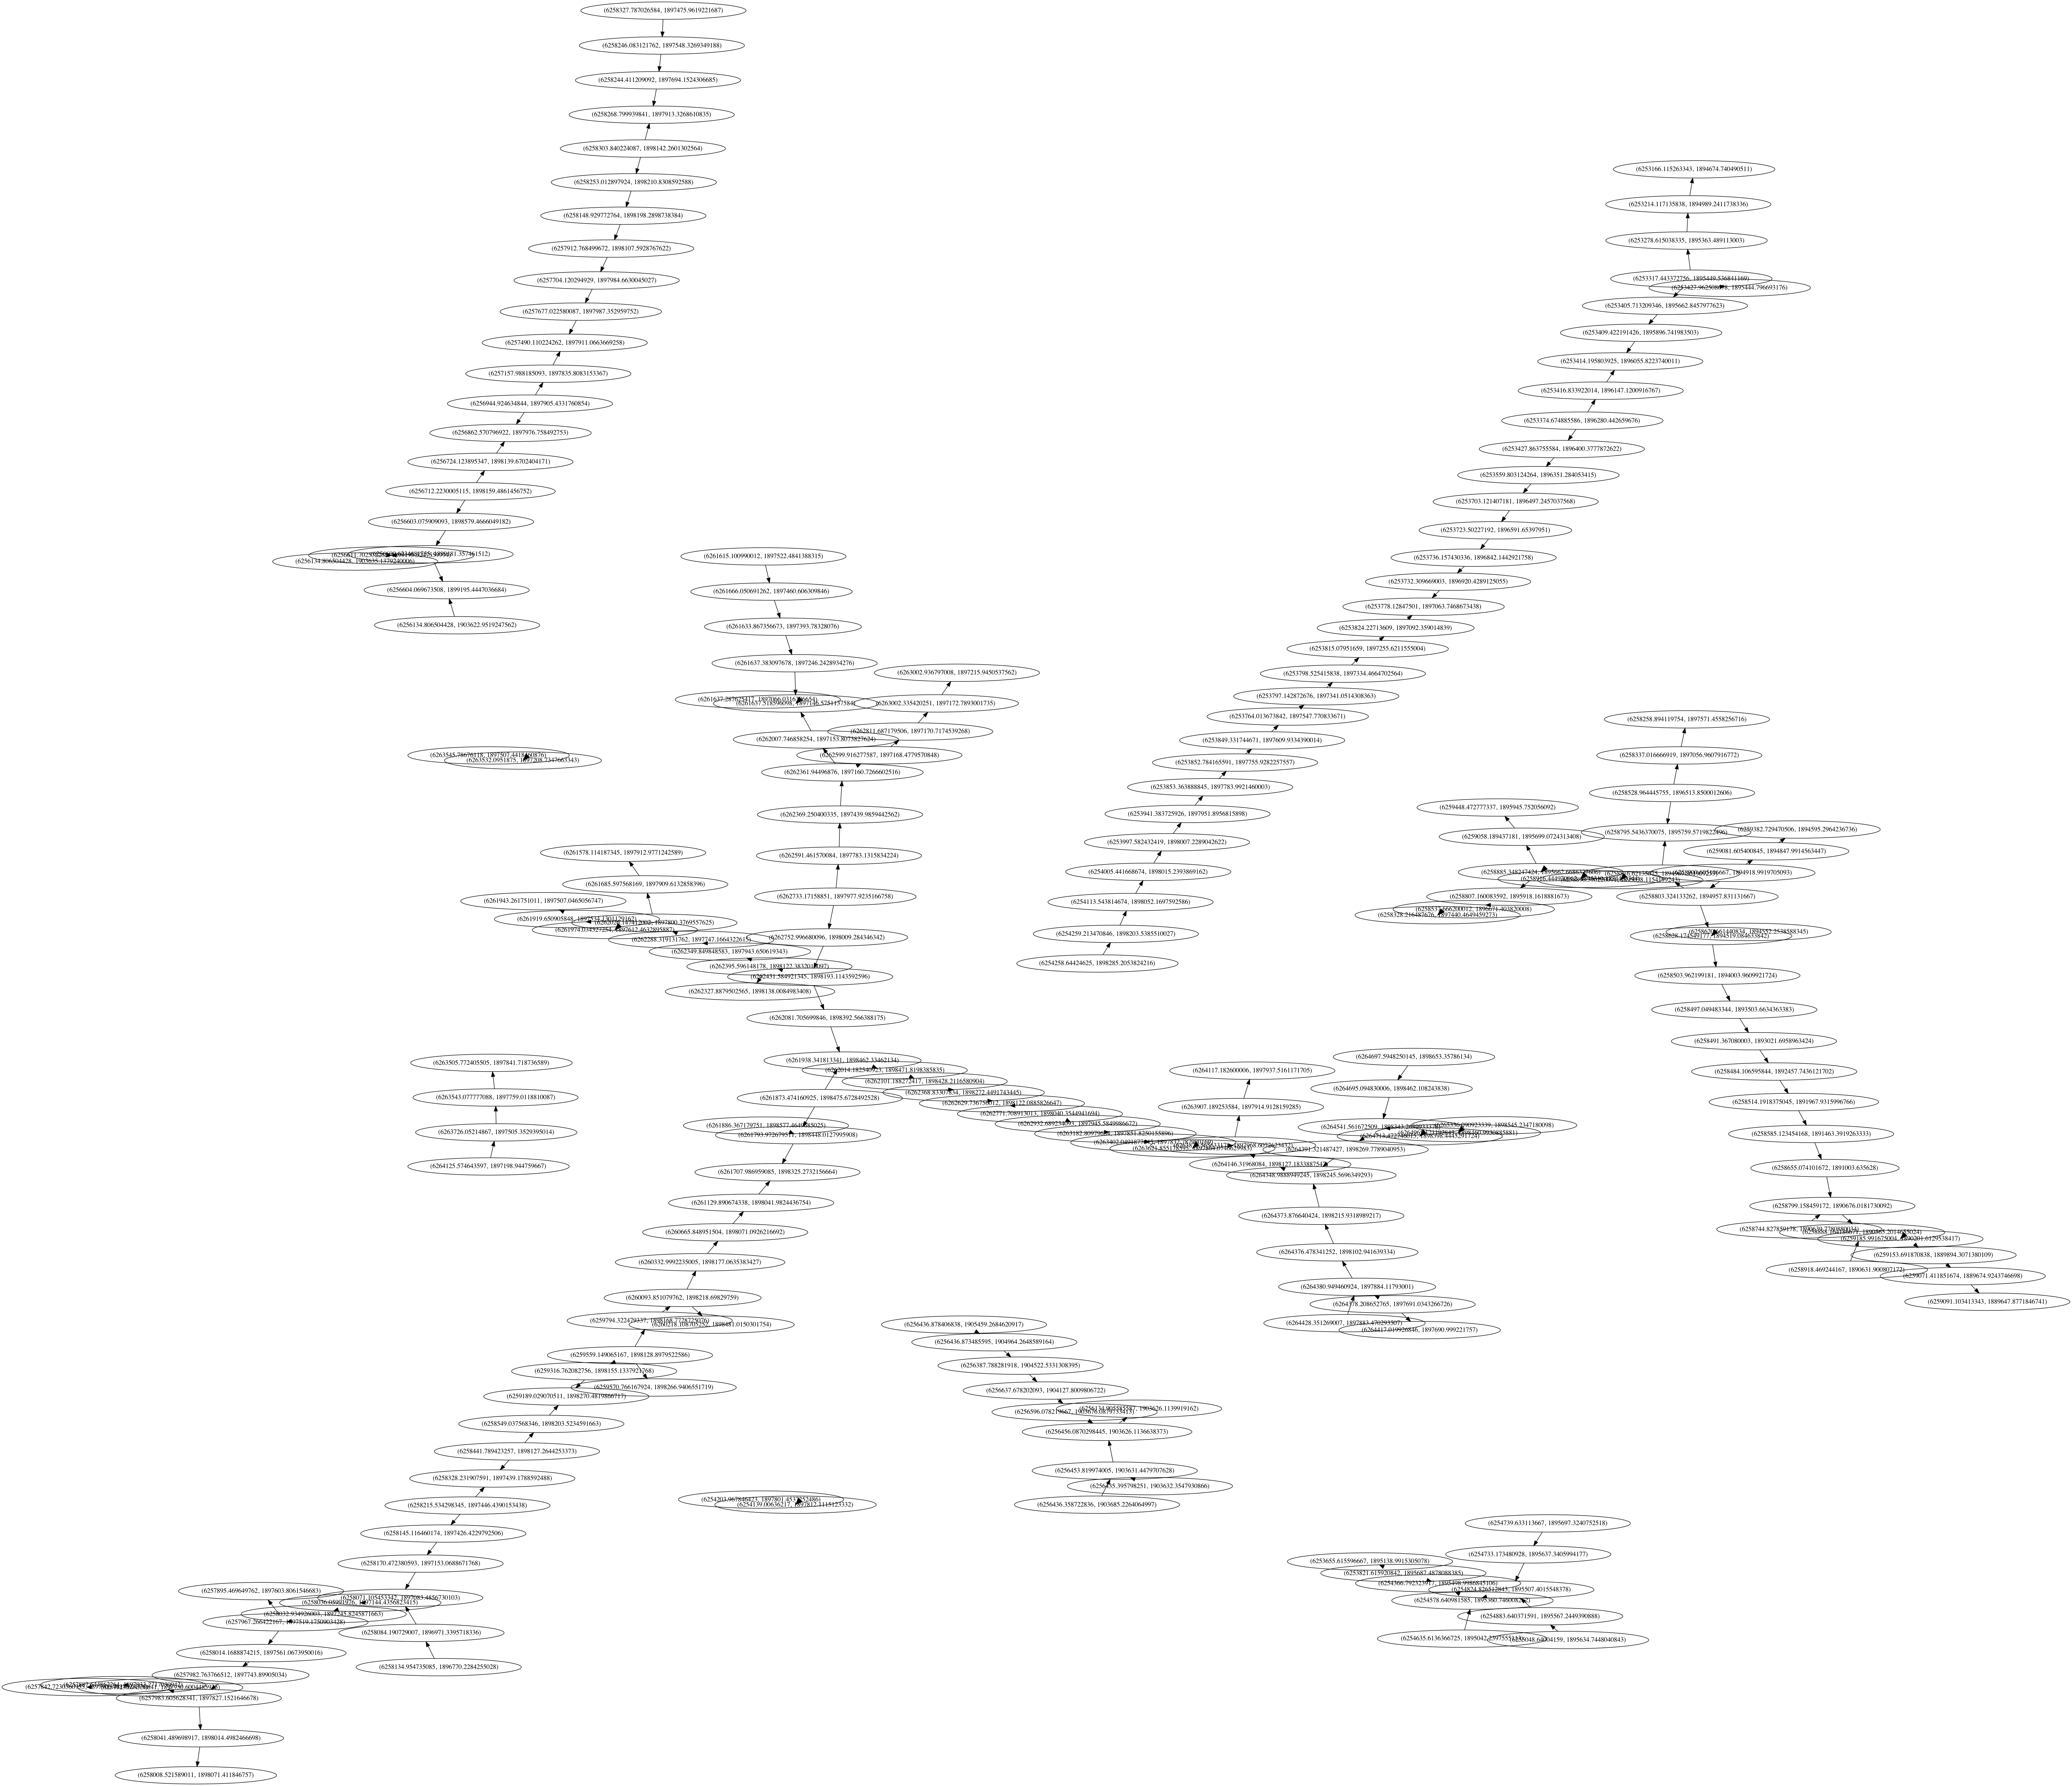

In [7]:
from IPython.display import Image
Image(filename='sewer.png',width=1000,height=300) 

In [16]:
! pip install geopandas

    100% |████████████████████████████████| 972kB 2.8MB/s ta 0:00:01
    100% |████████████████████████████████| 1.0MB 2.1MB/s ta 0:00:01
    100% |████████████████████████████████| 7.4MB 3.1MB/s ta 0:00:01
    100% |████████████████████████████████| 14.8MB 2.8MB/s ta 0:00:011
You are using pip version 19.0.1, however version 21.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
import geopandas

In [60]:
df_manhole = geopandas.read_file('network/Sewer_Manhole.shp')
df_manhole.head()

,OBJECTID,UCSD_ID,TYPE,IE,SDRSD,INSTALL_DA,AS_BUILT,LOCATION,MAINT_BY,MAINT_DATE,INFO_SOURC,PIC_SURVEY,NOTES,created_us,created_da,last_edite,last_edi_1,GLOBALID,geometry
0,1,C3M073,4' x 3' Manhole,0.0,SDS-107,1978-11-03,https://facilities.ucsd.edu/Drawings/home/shee...,HILLSIDE,NA,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{8A132BDD-1C1B-4D3F-B114-0F1AB76844F5},POINT (6260385.85344851 1900673.053296998)
1,2,C2M029,4' x 3' Manhole,0.0,BIOMEDICAL FACILITY II C5.01,2010-12-01,BIO MEDICIAL RESEARCH PH2 C3. 01,Biomedical Research Facility II,NA,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{5A7349A9-9684-42CA-A5E3-4217B5FA5A3C},POINT (6259334.251549095 1899321.881130591)
2,3,C2M032,4' x 3' Manhole,0.0,BIOMEDICAL FACILITY II C5.01,2010-12-01,BIO MEDICIAL RESEARCH PH2 C3. 01,Biomedical Research Facility II,NA,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{41B1206B-14C8-4C60-A57E-78B00BE185CE},POINT (6259141.41400826 1899150.964805752)
3,4,C2M031,4' x 3' Manhole,0.0,BIOMEDICAL FACILITY II C5.01,2010-12-01,BIO MEDICIAL RESEARCH PH2 C3. 01,Biomedical Research Facility II,NA,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{8A6BD0F6-A50B-445B-9587-1D2132DFCFF1},POINT (6259292.360884845 1899150.780094832)
4,5,C2M030,4' x 3' Manhole,0.0,BIOMEDICAL FACILITY II C5.01,2010-12-01,BIO MEDICIAL RESEARCH PH2 C3. 01,Biomedical Research Facility II,NA,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{45359A17-A3E2-47B8-A37E-99D0DDF60041},POINT (6259291.574141011 1899250.81631209)


In [62]:
manhole_coords = [(elem.x,elem.y)for elem in list(df_manhole["geometry"])]

In [87]:
df_pipe = geopandas.read_file('network/Sewer_Pipe.shp')
df_pipe.head()

,OBJECTID,UCSD_ID,STATUS,PRESSURE,SIZE,MATERIAL,IE_UP,IE_DN,SLOPE,INSTALL_DA,...,GLOBALID,FLOWDIRECT,FLOWDIRE_1,FLOWDIRE_2,FLOWDIRE_3,Shape_Le_1,FLOWDIRE_4,FLOWDIRE_5,FLOWDIRE_6,geometry
0,1,S00629,N,GRAVITY MAIN,6.0,PVC,371.00,370.30,0.008761,1987-07-31,...,{AD98EF75-0A02-4AF3-A805-167419E9030D},1,1,1,1,79.900871,1,1,1,LINESTRING (6258198.488400668 1900145.87685792...
1,2,S00625,N,GRAVITY MAIN,8.0,PVC,370.40,368.50,0.020139,1985-04-02,...,{D3E0381B-F1F5-4482-ADA0-3D715E6C9BF2},1,1,1,1,94.342478,1,1,1,LINESTRING (6258151.93239142 1899927.554459929...
2,3,S00627,N,GRAVITY MAIN,8.0,PVC,368.55,367.15,0.008563,1987-07-31,...,{C8514569-1585-4461-87F8-046E12C65FB1},1,1,1,1,163.490200,1,1,1,LINESTRING (6258109.673289597 1899935.36218708...
3,4,S00624,N,GRAVITY MAIN,8.0,PVC,368.50,366.60,0.020129,1985-08-16,...,{E653255E-4C64-4627-BB1F-0623BA9AFC05},1,1,1,1,94.391217,1,1,1,LINESTRING (6258148.384170175 1899833.27872984...
4,5,S00626,N,GRAVITY MAIN,8.0,PVC,367.15,366.60,0.009542,1987-07-31,...,{D4C416DF-5420-47C3-816A-738E48DBB07B},1,1,1,1,57.640522,1,1,1,LINESTRING (6258101.248109594 1899772.08921967...


In [106]:
segment_with_points[:15]

[[(6258198.488400668, 6258125.227392346),
  (1900145.8768579215, 1900113.9868298322)],
 [(6258151.93239142, 6258148.384170175),
  (1899927.5544599295, 1899833.278729841)],
 [(6258109.673289597, 6258101.248109594),
  (1899935.3621870875, 1899772.0892196745)],
 [(6258148.384170175, 6258148.365797505),
  (1899833.278729841, 1899738.8875144273)],
 [(6258101.248109594, 6258148.365797505),
  (1899772.0892196745, 1899738.8875144273)],
 [(6257772.18511942, 6257807.037083834),
  (1899411.261201173, 1899411.2546395063)],
 [(6257772.238268927, 6257807.055128425),
  (1899429.1512572616, 1899429.1450236738)],
 [(6258119.0121816695, 6258119.017102927, 6258246.32754384, 6258268.352762252),
  (1899328.7082166672,
   1899328.6980460882,
   1899073.7005245835,
   1899030.2202965915)],
 [(6257869.396539167, 6257928.657575503),
  (1899711.0483312607, 1899618.9438566715)],
 [(6257768.723512173, 6257688.902805671),
  (1900079.3422140926, 1900006.9030545056)],
 [(6257747.154657677, 6257768.723512173),
  (190

In [113]:
print(df_pipe["geometry"][7].coords.xy)

(array('d', [6258119.0121816695, 6258119.017102927, 6258246.32754384, 6258268.352762252]), array('d', [1899328.7082166672, 1899328.6980460882, 1899073.7005245835, 1899030.2202965915]))


In [180]:
segment_with_points = [[coord for coord in elem.coords] for elem in list(df_pipe["geometry"])]
segment_set = set(elem for arry in segment_with_points for elem in arry)
segment_set

{(6256781.619515255, 1899074.9698790014),
 (6253916.278461173, 1897086.3232657611),
 (6260941.575762257, 1900579.581043005),
 (6262046.730376095, 1901774.999255836),
 (6263262.974662751, 1900302.4831719995),
 (6256695.370343924, 1900823.6494525075),
 (6259534.493602678, 1899515.527068749),
 (6259534.5874345, 1899515.435205415),
 (6259006.363753423, 1901841.978780672),
 (6259006.346693084, 1901841.9810772538),
 (6259313.291617259, 1899321.5054751784),
 (6256625.97514151, 1902682.5620732605),
 (6263984.016527757, 1898931.334995672),
 (6256750.586112753, 1904226.8864124268),
 (6260940.097746834, 1902614.2456088364),
 (6260940.097746834, 1902614.2698870003),
 (6253674.101780176, 1896380.2219876647),
 (6257391.350251168, 1902508.8435886651),
 (6254692.423562422, 1896317.436352089),
 (6256779.822274759, 1904138.546694085),
 (6254692.817590505, 1896317.7080050856),
 (6261152.865365922, 1901595.2709407508),
 (6260786.007831931, 1900407.2017945945),
 (6259262.915405676, 1899457.263733834),
 (62

In [182]:
len(segment_set.intersection(set(manhole_coords)))

628

In [184]:
len(set(manhole_coords)),len(set(segment_set))

(631, 4586)

### Important findings: 628 out of 631 exist in segment endpoints

In [172]:
set(manhole_coords)

{(6253405.713209346, 1895662.8457977623),
 (6253550.432736173, 1896756.2550282627),
 (6253563.623982757, 1896608.0246816725),
 (6253616.0382480025, 1896328.685017258),
 (6253798.525415838, 1897334.4664702564),
 (6253858.769389838, 1897080.9164524227),
 (6253859.089599177, 1897090.5115775913),
 (6253942.759051263, 1897822.0524373353),
 (6253975.714037836, 1897066.6428589225),
 (6253975.865612343, 1897769.2976215929),
 (6253978.966327921, 1897081.7323956788),
 (6253982.890204594, 1898138.7112528384),
 (6253994.860981181, 1898057.532609418),
 (6254014.180496335, 1898002.5442023426),
 (6254079.66888243, 1897042.5815553367),
 (6254110.25182651, 1897913.21367234),
 (6254138.3620065, 1897811.279821083),
 (6254141.960424513, 1897070.6927195936),
 (6254146.548998013, 1897355.0451692492),
 (6254149.321958333, 1897908.8997045904),
 (6254163.85440959, 1897429.7874738425),
 (6254166.2822262645, 1897502.755175665),
 (6254203.866468668, 1897801.4537252486),
 (6254228.694831088, 1897801.175838679),
 (

In [171]:
segment_set

{(1900775.983865425, 1900707.929539591),
 (1901564.5498735905, 1901439.9379180819),
 (6258064.091687843, 6258064.205204681, 6258064.7868964225),
 (6256885.226919591, 6256885.680658847),
 (6261994.022476256, 6262023.97123526),
 (1899549.1375658363,
  1899536.4469744265,
  1899528.4443657547,
  1899525.4407628328,
  1899513.0356039256),
 (6257932.168395251, 6257932.172332257),
 (6256735.30235067, 6256741.429306924),
 (6261773.399886012,
  6261775.729605764,
  6261783.419551,
  6261785.685622588,
  6261788.759107262,
  6261795.799447507,
  6261798.649835512,
  6261805.90638268,
  6261808.889316335,
  6261819.433258504,
  6261820.584174842,
  6261829.208173335,
  6261830.606464505,
  6261838.834138334,
  6261840.387284845,
  6261864.933495596),
 (6260901.242837667, 6260901.22380884, 6260901.167706594),
 (6260165.0021841675, 6260051.971570343),
 (6261496.556935757, 6261487.758725002),
 (1901837.174328342, 1901841.557521671),
 (6259254.63622275, 6259255.64967218, 6259287.872048676, 6259288.5

In [72]:
tuple([elem.coords.xy for elem in list(df_pipe["geometry"])][0][0])

(6253317.443372756, 6253278.615038335)

In [33]:
df[['UCSD_ID','LOCATION']]

,UCSD_ID,LOCATION
0,None,None
1,None,None
2,None,None
3,S-01544,None
4,S-01556,None
5,S-01549,None
6,S-01503,None
7,S-01555,None
8,S-01553,None
9,None,None


In [43]:
G_network=nx.read_shp('network') 

In [52]:
len(G_network.nodes.items()),len(G.nodes.items())

(3837, 206)

In [44]:
list(G_network.nodes.items())[:2]

[((6253166.115263343, 1894674.740490511),
  {'GLOBALID': '{C8B8C957-7B0F-4BD5-9A1F-2C32AC817117}',
   'ShpName': 'Sewer_Trace'}),
 ((6253214.117135838, 1894989.2411738336),
  {'GLOBALID': '{1167FE92-7C86-41D6-862B-505DEDB65A88}',
   'ShpName': 'Sewer_Trace'})]

In [48]:
list(G_network.edges.items())[:2]

[(((6253214.117135838, 1894989.2411738336),
   (6253166.115263343, 1894674.740490511)),
  {'UCSD_ID': None,
   'STATUS': 'N',
   'PRESSURE': 'GRAVITY MAIN',
   'SIZE': 0.0,
   'MATERIAL': None,
   'IE_UP': 0.0,
   'IE_DN': 0.0,
   'SLOPE': 0.0,
   'INSTALL_DA': None,
   'AS_BUILT': 'https://facilities.ucsd.edu/Drawings/Home/Sheets/Default.htm?Skey=76130',
   'LOCATION': None,
   'INFO_SOURC': None,
   'NOTES': None,
   'LENGTH': 0.0,
   'created_us': None,
   'created_da': None,
   'last_edite': None,
   'last_edi_1': None,
   'Shape__Len': 0.0,
   'GLOBALID': '{F1C40177-BFFE-40BC-8758-9A6C614E93A4}',
   'FLOWDIRECT': 1,
   'FLOWDIRE_1': 1,
   'FLOWDIRE_2': 1,
   'FLOWDIRE_3': 1,
   'FLOWDIRE_4': 1,
   'Shape_Leng': 318.154236212,
   'FLOWDIRE_5': 1,
   'FLOWDIRE_6': 1,
   'FLOWDIRE_7': 1,
   'ShpName': 'City_Sewer_Pipe',
   'Wkb': b"\x00\x00\x00\x00\x02\x00\x00\x00\x04AW\xda\xa7\x87\x7f'PA<\xeaM=\xbd\x91\x80AW\xda\xa2%;R\xe0A<\xe9\xc7>\xd1%\xc0AW\xda\xa0\xc7j\x89\x80A<\xe9\xa5=R\x94\x

In [51]:
list(G.edges.items())[:2]

[(((6253317.443372756, 1895449.536841169),
   (6253278.615038335, 1895363.489113003)),
  {'UCSD_ID': None,
   'STATUS': 'N',
   'PRESSURE': 'GRAVITY MAIN',
   'SIZE': 8.0,
   'MATERIAL': 'VCP',
   'IE_UP': 11.63,
   'IE_DN': 10.82,
   'SLOPE': 0.497569094861,
   'INSTALL_DA': None,
   'AS_BUILT': 'https://facilities.ucsd.edu/Drawings/Home/Sheets/Default.htm?Skey=76130',
   'LOCATION': None,
   'INFO_SOURC': None,
   'NOTES': None,
   'LENGTH': 162.791461199,
   'created_us': None,
   'created_da': None,
   'last_edite': None,
   'last_edi_1': None,
   'Shape__Len': 0.0,
   'GLOBALID': '{C0A7C061-068B-4084-83B3-D5341DF32559}',
   'FLOWDIRECT': 1,
   'FLOWDIRE_1': 1,
   'FLOWDIRE_2': 1,
   'FLOWDIRE_3': 1,
   'FLOWDIRE_4': 1,
   'Shape_Leng': 94.4026010046,
   'FLOWDIRE_5': 1,
   'FLOWDIRE_6': 1,
   'FLOWDIRE_7': 1,
   'ShpName': 'City_Sewer_Pipe',
   'Wkb': b'\x00\x00\x00\x00\x02\x00\x00\x00\x02AW\xda\xc1\\`8 A<\xec\x19\x89nl@AW\xda\xb7\xa7\\\xc9\xc0A<\xeb\xc3}6\x82\x80',
   'Wkt': 'LIN

In [83]:
df_manhole[['LOCATION','UCSD_ID','AS_BUILT','geometry']]

,LOCATION,UCSD_ID,AS_BUILT,geometry
0,HILLSIDE,C3M073,https://facilities.ucsd.edu/Drawings/home/shee...,POINT (6260385.85344851 1900673.053296998)
1,Biomedical Research Facility II,C2M029,BIO MEDICIAL RESEARCH PH2 C3. 01,POINT (6259334.251549095 1899321.881130591)
2,Biomedical Research Facility II,C2M032,BIO MEDICIAL RESEARCH PH2 C3. 01,POINT (6259141.41400826 1899150.964805752)
3,Biomedical Research Facility II,C2M031,BIO MEDICIAL RESEARCH PH2 C3. 01,POINT (6259292.360884845 1899150.780094832)
4,Biomedical Research Facility II,C2M030,BIO MEDICIAL RESEARCH PH2 C3. 01,POINT (6259291.574141011 1899250.81631209)
5,Biomedical Research Facility II,C2M028,BIO MEDICIAL RESEARCH PH2 C3. 01,POINT (6259363.730164677 1899370.183527425)
6,Northwest of UCSD Torrey Pines Center South,C8M003,https://facilities.ucsd.edu/Drawings/home/shee...,POINT (6256554.184274584 1905330.594834924)
7,PARKING LOT,S1M048,NOAA SOUTHWEST FISHERIES C404,POINT (6254228.694831088 1897801.175838679)
8,PARKING LOT,S1M053,N/A,POINT (6253798.525415838 1897334.466470256)
9,SERVICE YARD,S1M042,N/A,POINT (6253982.890204594 1898138.711252838)


In [91]:
df_pipe[['UCSD_ID','SLOPE','AS_BUILT','LOCATION','geometry']]

,UCSD_ID,SLOPE,AS_BUILT,LOCATION,geometry
0,S00629,0.008761,https://facilities.ucsd.edu/Drawings/home/shee...,N/A,LINESTRING (6258198.488400668 1900145.87685792...
1,S00625,0.020139,https://facilities.ucsd.edu/Drawings/home/shee...,N/A,LINESTRING (6258151.93239142 1899927.554459929...
2,S00627,0.008563,https://facilities.ucsd.edu/Drawings/home/shee...,N/A,LINESTRING (6258109.673289597 1899935.36218708...
3,S00624,0.020129,https://facilities.ucsd.edu/Drawings/home/shee...,N/A,LINESTRING (6258148.384170175 1899833.27872984...
4,S00626,0.009542,https://facilities.ucsd.edu/Drawings/home/shee...,N/A,LINESTRING (6258101.248109594 1899772.08921967...
5,S00468,0.018650,https://facilities.ucsd.edu/Drawings/Home/Shee...,N/A,LINESTRING (6257772.18511942 1899411.261201173...
6,S00467,0.096218,https://facilities.ucsd.edu/Drawings/Home/Shee...,N/A,LINESTRING (6257772.238268927 1899429.15125726...
7,S00512,0.021722,https://facilities.ucsd.edu/Drawings/Home/Shee...,N/A,LINESTRING (6258119.012181669 1899328.70821666...
8,S00517,0.014152,https://facilities.ucsd.edu/Drawings/Home/Shee...,N/A,LINESTRING (6257869.396539167 1899711.04833126...
9,S00521,0.017070,https://facilities.ucsd.edu/Drawings/home/shee...,N/A,LINESTRING (6257768.723512173 1900079.34221409...


In [114]:
set(df_pipe['LOCATION'])

{'0',
 'ARGO HALL',
 'Athena Circle',
 'BIOLOGICAL GRADE',
 'BIOLOGICAL GRADE EAST OF HUBBS HALL',
 'BIOMED RESEARCH FACILITY II',
 'BIRCH AQUARIUM',
 'BLAKE HALL',
 'BONNER HALL',
 'Between Pacific Hall and Recreation Gym',
 'Biological Field Station',
 'CENTRAL UTILITY PLANT',
 'COAST APARTMENTS',
 'COGNITIVE SCIENCE BLDG',
 'COMMUNICATION BLDG',
 'Campus Point Drive',
 'Center for Coastal Studies',
 'Central Utilities Plant',
 'DEEP SEE DRILLING BLDGS',
 'EAST CAMPUS UTILITIES PLANT',
 'EAST OF HOPKINS PARKING',
 'EAST OF MANDELL WEISS FORUM',
 'EAST OF PANGEA PARKING',
 'EAST OF RIMAC ARENA',
 'EAST OF SOLIS HALL',
 'EAST YORK HALL',
 'ECKART BLDG',
 'ERC ADMISSION BLDG',
 'ERC HOUSING FACIILTIES',
 'ERC HOUSING FACILITIES',
 'ERC LAUNDRY EAST',
 'ERC PUMP STATION',
 'ERC Pump Station',
 'EUCALYPTUS POINT',
 'East Campus',
 'Extended Studies and Public Programs BuildingS',
 'Extended Studies and Public Programs Buildings',
 'FACULTY CLUB EXPANSION',
 'FRED N SPIESS HALL',
 'GENEVA 

In [117]:
set(df_manhole['LOCATION'])

{'A/C OVER LAID ON TOP',
 'ACCESS ROAD',
 'ALTMAN CLINICAL & TRANSLATIONAL RESEARCH INSTITUTE',
 'ARTISTS LANE PARKING AREA',
 'ATHENA CIRCLE',
 'Athena Circle',
 'BETWEEN UREY HALL AND BLAKE HALL',
 'BIOLOGICAL GRADE',
 'BIRCH AQUARIUM AND SEAWEED CANYON SEWER CONNECTION',
 'BIRCH AQUARIUM PARKING LOT',
 'BURIED',
 'BUSHES',
 'BUSHES BY BUILDING',
 'BY BUILDING OFF PATH',
 'Biomedical Research Facility II',
 'CAMPUS POINT DR',
 'CAMPUS SERVICE COMPLEX',
 'CITY CONNECTION I-5',
 'CLOSE TO BIRCH AQUARIUM PARKING LOT',
 'CLOSE TO SIXTH COLLEGE AND I-5 CALTRANS ROW',
 'COAST APARTMENTS',
 'COULD NOT LOCATE',
 'COURTYARD AT ASANTE HOUSING IN ROOSEVELT COLLEGE',
 'CRSF',
 'Central Utilities Plant',
 'Close by Marine Sciences Development Center - Building C',
 'DOWN HILL IN PEPPER CANYON',
 'DOWNSTAIRS IN BUSHES',
 'DRIVEWAY',
 'EAST ECONOMICS BLDG',
 'EAST OF BIRCH AQUARIUM',
 'EAST OF CUP (BETWEEN REVELLE AND THEATRE)',
 'EAST OF CVC',
 'EAST OF ECOB',
 'EAST OF ECUP',
 'EAST OF GILDRED LA

In [118]:
df_manhole
df_pipe.head()

,OBJECTID,UCSD_ID,STATUS,PRESSURE,SIZE,MATERIAL,IE_UP,IE_DN,SLOPE,INSTALL_DA,...,GLOBALID,FLOWDIRECT,FLOWDIRE_1,FLOWDIRE_2,FLOWDIRE_3,Shape_Le_1,FLOWDIRE_4,FLOWDIRE_5,FLOWDIRE_6,geometry
0,1,S00629,N,GRAVITY MAIN,6.0,PVC,371.00,370.30,0.008761,1987-07-31,...,{AD98EF75-0A02-4AF3-A805-167419E9030D},1,1,1,1,79.900871,1,1,1,LINESTRING (6258198.488400668 1900145.87685792...
1,2,S00625,N,GRAVITY MAIN,8.0,PVC,370.40,368.50,0.020139,1985-04-02,...,{D3E0381B-F1F5-4482-ADA0-3D715E6C9BF2},1,1,1,1,94.342478,1,1,1,LINESTRING (6258151.93239142 1899927.554459929...
2,3,S00627,N,GRAVITY MAIN,8.0,PVC,368.55,367.15,0.008563,1987-07-31,...,{C8514569-1585-4461-87F8-046E12C65FB1},1,1,1,1,163.490200,1,1,1,LINESTRING (6258109.673289597 1899935.36218708...
3,4,S00624,N,GRAVITY MAIN,8.0,PVC,368.50,366.60,0.020129,1985-08-16,...,{E653255E-4C64-4627-BB1F-0623BA9AFC05},1,1,1,1,94.391217,1,1,1,LINESTRING (6258148.384170175 1899833.27872984...
4,5,S00626,N,GRAVITY MAIN,8.0,PVC,367.15,366.60,0.009542,1987-07-31,...,{D4C416DF-5420-47C3-816A-738E48DBB07B},1,1,1,1,57.640522,1,1,1,LINESTRING (6258101.248109594 1899772.08921967...


In [120]:
df_line = geopandas.read_file('network/AddLine.shp')
df_line.head()

,Shape_Leng,GLOBALID,FLOWDIRECT,FLOWDIRE_1,FLOWDIRE_2,geometry


In [121]:
df_build = geopandas.read_file('network/Sewer_Buildings.shp')
df_build.head()

,Join_Count,TARGET_FID,JOIN_FID,NAME,CAANtext,addr,FAC_LINK,CONST_DOC,Shape__Are,Shape__Len,GLOBALID,geometry
0,1,1,110,George Palade Laboratories for Cellular and Mo...,6143,9405 Gilman Drive,https://facilities.ucsd.edu/Buildings/Home/Def...,https://facilities.ucsd.edu/Drawings/Home/Shee...,0.0,0.0,{6D588902-B09B-4B8A-82C9-17E0E9FB8226},POINT (6258198.488400668 1900145.876857921)
1,1,2,92,York Hall,6361,9240 Herbert York Lane,https://facilities.ucsd.edu/Buildings/Home/Def...,https://facilities.ucsd.edu/Drawings/Home/Shee...,0.0,0.0,{C5A786F6-F648-4AB7-A3B8-D3910D937FAC},POINT (6257772.18511942 1899411.261201173)
2,1,3,92,York Hall,6361,9240 Herbert York Lane,https://facilities.ucsd.edu/Buildings/Home/Def...,https://facilities.ucsd.edu/Drawings/Home/Shee...,0.0,0.0,{80B84152-8673-4953-A644-CECC91803D4C},POINT (6257772.238268927 1899429.151257262)
3,1,4,107,Bonner Hall,6353,9300 Eucalyptus Grove Lane,https://facilities.ucsd.edu/Buildings/Home/Def...,https://facilities.ucsd.edu/Drawings/Home/Shee...,0.0,0.0,{8D97A4A9-C2A2-4DC4-B1BF-5C50888B3BE5},POINT (6257654.38548626 1900122.283401176)
4,1,5,101,Mayer Hall,6352,9278 Eucalyptus Grove Lane,https://facilities.ucsd.edu/Buildings/Home/Def...,https://facilities.ucsd.edu/Drawings/Home/Shee...,0.0,0.0,{7CE1C29B-CF7D-4E93-BE48-F958899D1903},POINT (6257630.175889 1899661.723626763)


In [123]:
df_build.columns

Index(['Join_Count', 'TARGET_FID', 'JOIN_FID', 'NAME', 'CAANtext', 'addr',
       'FAC_LINK', 'CONST_DOC', 'Shape__Are', 'Shape__Len', 'GLOBALID',
       'geometry'],
      dtype='object')

In [131]:
df_clean = geopandas.read_file('network/Sewer_Cleanout.shp')
df_clean.head()

,OBJECTID,UCSD_ID,TYPE,IE,SDRSD,INSTALL_DA,AS_BUILT,LOCATION,MAINT_BY,MAINT_DATE,INFO_SOURC,PIC_SURVEY,NOTES,created_us,created_da,last_edite,last_edi_1,GLOBALID,geometry
0,1,SC0001,Sewer Type Cleanout,0.0,SC-01,1985-08-09,https://facilities.ucsd.edu/Drawings/Home/Shee...,TORREY PINES CENTER SOUTH BLDG,None,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{CCA75996-AC6F-4809-8C76-BCC55CAD4C2F},POINT (6256816.621085674 1905308.079131916)
1,2,SC0002,Sewer Type Cleanout,0.0,SC-01,1985-08-09,https://facilities.ucsd.edu/Drawings/Home/Shee...,TORREY PINES CENTER SOUTH BLDG,None,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{203B76E2-FE81-4523-82E6-E578B3BC3B6A},POINT (6256786.628363505 1905307.40557684)
2,3,SC0003,Sewer Type Cleanout,0.0,SC-01,1985-08-09,https://facilities.ucsd.edu/Drawings/Home/Shee...,TORREY PINES CENTER SOUTH BLDG,None,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{1FD33255-10D0-45E8-ACB8-7A50EC7659BC},POINT (6256767.547036842 1905290.476148754)
3,4,SC0004,Sewer Type Cleanout,0.0,SC-01,1985-08-09,https://facilities.ucsd.edu/Drawings/Home/Shee...,TORREY PINES CENTER SOUTH BLDG,None,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{104FAF24-691C-4A9C-BD6B-58DADA43A61D},POINT (6256587.091032922 1905286.422679171)
4,5,SC0005,Sewer Type Cleanout,0.0,SC-01,1974-11-06,https://facilities.ucsd.edu/Drawings/Home/Shee...,Marshall College Dean's Residence,None,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{D37E68F0-3C81-489D-ABBA-5D31C6A9C8D0},POINT (6258125.22181493 1902193.923286751)


In [132]:
df_misc = geopandas.read_file('network/Sewer_Misc.shp')
df_misc.head()

,OBJECTID,UCSD_ID,TYPE,IE,SDRSD,INSTALL_DA,AS_BUILT,LOCATION,MAINT_BY,MAINT_DATE,INFO_SOURC,PIC_SURVEY,NOTES,created_us,created_da,last_edite,last_edi_1,GLOBALID,geometry
0,1,SMISC-010,None,0.0,None,1998-04-19,https://facilities.ucsd.edu/Drawings/home/shee...,SERVICE YARD,None,None,None,K:\06 Photos\SEWER\CSC\IMG_0503.JPG,None,None,None,AINCIONG,2016-10-13,{991F4722-FB23-4389-8DE0-D71829F90E1B},POINT (6261069.932789013 1902652.748812675)
1,2,SMISC-011,None,0.0,None,None,https://facilities.ucsd.edu/Drawings/Home/Shee...,None,None,None,None,None,None,None,None,AINCIONG,2016-10-13,{E70D51A4-C258-42DA-80C3-03C0698887DC},POINT (6259389.90530917 1902004.924320921)
2,3,SMISC-001,None,0.0,None,2007-08-18,https://facilities.ucsd.edu/Drawings/home/shee...,None,None,None,None,K:\06 Photos\SEWER\IMG_0264.JPG,None,None,None,AINCIONG,2016-10-13,{C838184D-6DD7-4513-89AA-39D6682C1E60},POINT (6258962.26935342 1899367.499805748)
3,4,SMISC-012,None,0.0,None,None,https://facilities.ucsd.edu/Drawings/home/shee...,CONCRETE SERVICE AREA,None,None,None,None,None,None,None,AINCIONG,2016-10-13,{5C648DC4-1CD0-42B3-AD44-AA3C16A0B982},POINT (6254332.764832929 1897756.503027752)
4,5,SMISC-013,None,0.0,None,None,https://facilities.ucsd.edu/Drawings/Home/Shee...,N/A,None,None,None,None,None,None,None,AINCIONG,2016-10-13,{C0C840FA-E7F7-4092-8BA3-7894009B885B},POINT (6254359.917993844 1897702.022493675)


In [133]:
df_trace = geopandas.read_file('network/Sewer_Trace.shp')
df_trace.head()

,GLOBALID,geometry
0,{C8B8C957-7B0F-4BD5-9A1F-2C32AC817117},POINT (6253166.115263343 1894674.740490511)
1,{1167FE92-7C86-41D6-862B-505DEDB65A88},POINT (6253214.117135838 1894989.241173834)
2,{A093D3F3-AAF7-4B51-960B-12FA45F533D0},POINT (6253278.615038335 1895363.489113003)
3,{16EF38E7-299F-4A3A-9A81-BE0C9D3455F2},POINT (6253314.28721109 1895845.284737334)
4,{432FB22D-C160-4BAF-B3A5-E0D18E2660FF},POINT (6253317.443372756 1895449.536841169)


In [134]:
len(set(df_manhole['LOCATION']).intersection(set(df_pipe['LOCATION'])))

34

In [139]:
len(set(df_manhole['LOCATION'])),len(set(df_pipe['LOCATION']))

(208, 177)

In [140]:
set(df_pipe['LOCATION'])

{'0',
 'ARGO HALL',
 'Athena Circle',
 'BIOLOGICAL GRADE',
 'BIOLOGICAL GRADE EAST OF HUBBS HALL',
 'BIOMED RESEARCH FACILITY II',
 'BIRCH AQUARIUM',
 'BLAKE HALL',
 'BONNER HALL',
 'Between Pacific Hall and Recreation Gym',
 'Biological Field Station',
 'CENTRAL UTILITY PLANT',
 'COAST APARTMENTS',
 'COGNITIVE SCIENCE BLDG',
 'COMMUNICATION BLDG',
 'Campus Point Drive',
 'Center for Coastal Studies',
 'Central Utilities Plant',
 'DEEP SEE DRILLING BLDGS',
 'EAST CAMPUS UTILITIES PLANT',
 'EAST OF HOPKINS PARKING',
 'EAST OF MANDELL WEISS FORUM',
 'EAST OF PANGEA PARKING',
 'EAST OF RIMAC ARENA',
 'EAST OF SOLIS HALL',
 'EAST YORK HALL',
 'ECKART BLDG',
 'ERC ADMISSION BLDG',
 'ERC HOUSING FACIILTIES',
 'ERC HOUSING FACILITIES',
 'ERC LAUNDRY EAST',
 'ERC PUMP STATION',
 'ERC Pump Station',
 'EUCALYPTUS POINT',
 'East Campus',
 'Extended Studies and Public Programs BuildingS',
 'Extended Studies and Public Programs Buildings',
 'FACULTY CLUB EXPANSION',
 'FRED N SPIESS HALL',
 'GENEVA 

In [141]:
set(df_manhole['LOCATION'])

{'A/C OVER LAID ON TOP',
 'ACCESS ROAD',
 'ALTMAN CLINICAL & TRANSLATIONAL RESEARCH INSTITUTE',
 'ARTISTS LANE PARKING AREA',
 'ATHENA CIRCLE',
 'Athena Circle',
 'BETWEEN UREY HALL AND BLAKE HALL',
 'BIOLOGICAL GRADE',
 'BIRCH AQUARIUM AND SEAWEED CANYON SEWER CONNECTION',
 'BIRCH AQUARIUM PARKING LOT',
 'BURIED',
 'BUSHES',
 'BUSHES BY BUILDING',
 'BY BUILDING OFF PATH',
 'Biomedical Research Facility II',
 'CAMPUS POINT DR',
 'CAMPUS SERVICE COMPLEX',
 'CITY CONNECTION I-5',
 'CLOSE TO BIRCH AQUARIUM PARKING LOT',
 'CLOSE TO SIXTH COLLEGE AND I-5 CALTRANS ROW',
 'COAST APARTMENTS',
 'COULD NOT LOCATE',
 'COURTYARD AT ASANTE HOUSING IN ROOSEVELT COLLEGE',
 'CRSF',
 'Central Utilities Plant',
 'Close by Marine Sciences Development Center - Building C',
 'DOWN HILL IN PEPPER CANYON',
 'DOWNSTAIRS IN BUSHES',
 'DRIVEWAY',
 'EAST ECONOMICS BLDG',
 'EAST OF BIRCH AQUARIUM',
 'EAST OF CUP (BETWEEN REVELLE AND THEATRE)',
 'EAST OF CVC',
 'EAST OF ECOB',
 'EAST OF ECUP',
 'EAST OF GILDRED LA

In [135]:
df_citypipe = geopandas.read_file('network/City_Sewer_Pipe.shp')
df_citypipe.columns

Index(['UCSD_ID', 'STATUS', 'PRESSURE', 'SIZE', 'MATERIAL', 'IE_UP', 'IE_DN',
       'SLOPE', 'INSTALL_DA', 'AS_BUILT', 'LOCATION', 'INFO_SOURC', 'NOTES',
       'LENGTH', 'created_us', 'created_da', 'last_edite', 'last_edi_1',
       'Shape__Len', 'GLOBALID', 'FLOWDIRECT', 'FLOWDIRE_1', 'FLOWDIRE_2',
       'FLOWDIRE_3', 'FLOWDIRE_4', 'Shape_Leng', 'FLOWDIRE_5', 'FLOWDIRE_6',
       'FLOWDIRE_7', 'geometry'],
      dtype='object')

In [136]:
len(set(df_manhole['LOCATION']).intersection(set(df_citypipe['LOCATION'])))

4

In [137]:
df_pipe.columns

Index(['OBJECTID', 'UCSD_ID', 'STATUS', 'PRESSURE', 'SIZE', 'MATERIAL',
       'IE_UP', 'IE_DN', 'SLOPE', 'INSTALL_DA', 'AS_BUILT', 'LOCATION',
       'MAINT_BY', 'MAINT_DATE', 'INFO_SOURC', 'PIC_SURVEY', 'NOTES', 'LENGTH',
       'created_us', 'created_da', 'last_edite', 'last_edi_1', 'Shape_Leng',
       'CCTV_Date', 'CCTV_By', 'Severity', 'Cleaned_Da', 'Inspection',
       'GLOBALID', 'FLOWDIRECT', 'FLOWDIRE_1', 'FLOWDIRE_2', 'FLOWDIRE_3',
       'Shape_Le_1', 'FLOWDIRE_4', 'FLOWDIRE_5', 'FLOWDIRE_6', 'geometry'],
      dtype='object')

In [144]:
df_pipe.iloc[0]

OBJECTID                                                      1
UCSD_ID                                                  S00629
STATUS                                                        N
PRESSURE                                           GRAVITY MAIN
SIZE                                                          6
MATERIAL                                                    PVC
IE_UP                                                       371
IE_DN                                                     370.3
SLOPE                                                0.00876086
INSTALL_DA                                           1987-07-31
AS_BUILT      https://facilities.ucsd.edu/Drawings/home/shee...
LOCATION                                                    N/A
MAINT_BY                                                     NA
MAINT_DATE                                                 None
INFO_SOURC                                                 None
PIC_SURVEY                              

In [145]:
df_manhole.iloc[0]

OBJECTID                                                      1
UCSD_ID                                                  C3M073
TYPE                                            4' x 3' Manhole
IE                                                            0
SDRSD                                                   SDS-107
INSTALL_DA                                           1978-11-03
AS_BUILT      https://facilities.ucsd.edu/Drawings/home/shee...
LOCATION                                               HILLSIDE
MAINT_BY                                                     NA
MAINT_DATE                                                 None
INFO_SOURC                                                 None
PIC_SURVEY                                                  N/A
NOTES                                                       N/A
created_us                                                 None
created_da                                                 None
last_edite                              

In [153]:
len(set(df_manhole['LOCATION']).intersection(set(df_pipe['LOCATION'])))

34

In [352]:
C3M158_point = df_manhole[df_manhole['UCSD_ID']=='C3M158']['geometry'][0]
print(C3M158_point)

POINT (6257389.747564092 1902510.378034428)


### As Built has more in common

In [149]:
len(set(df_manhole['AS_BUILT']).intersection(set(df_pipe['AS_BUILT'])))

180

In [160]:
len(set(df_pipe['AS_BUILT']))

501

In [152]:
len(set(df_manhole['AS_BUILT']))

271

In [159]:
len(set(df_build['NAME']))

443

In [165]:
import numpy as np
np.argmin([geo.distance(df_manhole['geometry'][0]) for geo in df_pipe['geometry']])

218

In [355]:
min([geo.distance(C3M158_point) for geo in df_pipe['geometry']])

0.0

In [169]:
print(df_pipe['geometry'][218])

LINESTRING (6260385.85344851 1900673.053296998, 6260397.561102256 1900561.809096918)


In [170]:
print(df_manhole['geometry'][0])

POINT (6260385.85344851 1900673.053296998)


In [175]:
[elem for elem in segment_set if elem[0] == 6260385.85344851]

[(6260385.85344851, 6260397.561102256)]

In [179]:
df_pipe['geometry'][218].coords[0]

(6260385.85344851, 1900673.0532969981)

In [313]:
len({(elem['geometry'].x,elem['geometry'].y) for _,elem in df_manhole[["UCSD_ID","geometry"]].iterrows()})

631

# Most important turning point of the adventure

In [195]:
manhole_coords_map = {(elem['geometry'].x,elem['geometry'].y):elem['UCSD_ID'] for _,elem in df_manhole[["UCSD_ID","geometry"]].iterrows()}

{(6260385.85344851, 1900673.0532969981): 'C3M073',
 (6259334.251549095, 1899321.881130591): 'C2M029',
 (6259141.41400826, 1899150.964805752): 'C2M032',
 (6259292.360884845, 1899150.7800948322): 'C2M031',
 (6259291.574141011, 1899250.8163120896): 'C2M030',
 (6259363.730164677, 1899370.183527425): 'C2M028',
 (6256554.184274584, 1905330.5948349237): 'C8M003',
 (6254228.694831088, 1897801.175838679): 'S1M048',
 (6253798.525415838, 1897334.4664702564): 'S1M053',
 (6253982.890204594, 1898138.7112528384): 'S1M042',
 (6254014.180496335, 1898002.5442023426): 'S1M040',
 (6254574.9241255075, 1896234.9867138416): 'S2M025',
 (6253994.860981181, 1898057.532609418): 'S1M031',
 (6255932.792800844, 1897690.1760606766): 'S2M021',
 (6256447.027664751, 1897568.2858844995): 'S2M022',
 (6255639.9377435, 1897362.576322168): 'S2M011',
 (6255402.351604506, 1897941.555479169): 'S2M017',
 (6255504.0128185, 1897693.4539412558): 'S2M016A',
 (6255533.79097417, 1897884.2806593329): 'S2M016',
 (6255718.083912671, 189

In [319]:
coords_manhole_map = {elem['UCSD_ID']:(elem['geometry'].x,elem['geometry'].y) for _,elem in df_manhole[["UCSD_ID","geometry"]].iterrows()}

In [329]:
len(coords_manhole_map) == len(manhole_coords_map)

True

In [330]:
coords_manhole_map['C3M158']

(6257389.747564092, 1902510.3780344278)

In [361]:
def searchSewer(seg_loc,visited,res,sew_map,man_map):
    if seg_loc in visited: return
    visited.add(seg_loc)
    if seg_loc in man_map: res.add(man_map[seg_loc])
    for seg,val in sew_map[seg_loc].items():
        print(seg,val['UCSD_ID'])
        searchSewer(seg,visited,res,sew_map,man_map)

In [368]:
manhole_coords_map[(6258125.315646753, 1902158.9341835082)]

'C3M149'

In [364]:
manhole_coords_map["C3M149"]

KeyError: 'C3M149'

In [369]:
res = set()
searchSewer(coords_manhole_map['C3M158'],set(),res,sew_edges,manhole_coords_map)
res

(6257544.132425919, 1902367.762834087) S01108
(6257642.5748143345, 1902385.942915842) S01107
(6257672.717142507, 1902290.968696341) S01105
(6257682.694812834, 1902221.8681127578) S01104
(6257853.536662757, 1902221.799543336) S01095
(6257945.51909034, 1902161.457144335) S01093
(6258125.315646753, 1902158.9341835082) S01071
(6258122.989864007, 1902062.7985490113) S01070
(6258169.8126050085, 1902015.5752182603) S01069
(6258576.909559846, 1901978.9729292542) S01152
(6258641.346110761, 1901986.9545405954) S01151
(6258809.044922337, 1901906.7503046691) S01147
(6259006.346693084, 1901841.9810772538) S01146


{'C3M148',
 'C3M149',
 'C3M150',
 'C3M151',
 'C3M152',
 'C3M158',
 'C3M164',
 'C3M165',
 'C3M166',
 'C3M167'}

In [326]:
sew_edges = nx.convert.to_dict_of_dicts(G)
sew_map_pure = {key:set(value.keys()) for key,value in sew_edges.items()}
sew_map_pure

{(6258198.488400668,
  1900145.8768579215): {(6258125.227392346, 1900113.9868298322)},
 (6258125.227392346,
  1900113.9868298322): {(6258109.673289597, 1899935.3621870875)},
 (6258151.93239142,
  1899927.5544599295): {(6258148.384170175, 1899833.278729841)},
 (6258148.384170175,
  1899833.278729841): {(6258148.365797505, 1899738.8875144273)},
 (6258109.673289597,
  1899935.3621870875): {(6258101.248109594, 1899772.0892196745)},
 (6258101.248109594,
  1899772.0892196745): {(6258148.365797505, 1899738.8875144273)},
 (6258148.365797505,
  1899738.8875144273): {(6258148.347424835, 1899645.4027932584)},
 (6257772.18511942,
  1899411.261201173): {(6257807.037083834, 1899411.2546395063)},
 (6257807.037083834, 1899411.2546395063): set(),
 (6257772.238268927,
  1899429.1512572616): {(6257807.055128425, 1899429.1450236738)},
 (6257807.055128425, 1899429.1450236738): set(),
 (6258119.0121816695,
  1899328.7082166672): {(6258119.017102927, 1899328.6980460882),
  (6258268.352762252, 1899030.2202965

In [327]:
geo_map = defaultdict(set)
for key,values in sew_map_pure.items():
    if manhole_coords_map.get(key,None):
        for val in values:
            if manhole_coords_map.get(val,None):
                geo_map[manhole_coords_map[key]].add(manhole_coords_map[val])
            if manhole_coords_map[key] == 'C3M158': print(val)
geo_map

(6257544.132425919, 1902367.762834087)


defaultdict(set,
            {'C1M043': {'C1M041'},
             'C1M114': {'C1M039'},
             'C1M041': {'C1M040'},
             'C1M040': {'C1M039'},
             'C1M039': {'C1M037A'},
             'C1M026': {'C1M012'},
             'C1M012': {'C1M085'},
             'C1M027A': {'C1M027'},
             'C1M027': {'C1M026'},
             'C1M034': {'C1M033'},
             'C1M033': {'C1M033A'},
             'C1M035': {'C1M034'},
             'C1M029A': {'C1M028'},
             'C1M024': {'C1M023'},
             'C1M017': {'C1M014'},
             'C1M126': {'C1M127'},
             'C1M127': {'C1M013', 'C1M128'},
             'C1M012B': {'C1M100'},
             'C1M100': {'C1M083'},
             'C1M006': {'C1M002'},
             'C1M002': {'C1M012A'},
             'C1M005': {'C1M004'},
             'C1M004': {'C1M006'},
             'C1M003': {'C1M006'},
             'C1M009': {'C1M003'},
             'C1M048': {'C1M046'},
             'C1M046': {'C1M045A'},
             'C1M049'

In [328]:
sew_map_pure[(6257544.132425919, 1902367.762834087)]

{(6257642.5748143345, 1902385.942915842)}

In [318]:
manhole_coords_map[(6257544.132425919, 1902367.762834087)]

KeyError: (6257544.132425919, 1902367.762834087)

In [315]:
np.argmin([geo.distance((6257544.132425919, 1902367.762834087)) for geo in df_pipe['geometry']])

AttributeError: 'tuple' object has no attribute '_geom'

In [209]:
len(geo_map),len(sew_map_pure),len(manhole_coords_map)

(622, 3169, 631)

In [210]:
len(segment_set.intersection(set(manhole_coords)))

628

In [230]:
manhole_graph['C1M059']

{'to': {'C1M060'}, 'SampleID': 'AS064'}

In [235]:
manhole_graph['S2M015']

{'to': {'s2M016', 's2M017'}, 'SampleID': 'AS054'}

In [234]:
manhole_graph.keys()

dict_keys(['C1M031', 'C1M057', 'C1M059', 'C1M060', 'C1M161', 'C2M015', 'C3M022', 'C3M039', 'C3M041', 'C3M042', 'C3M097', 'C3M099', 'C3M149', 'C3M150', 'C3M152', 'C3M158', 'C3M159', 'C6M021', 'C6M025', 'C6M030', 'C6M031', 'C6M033', 'C6M034', 'C6M041', 'C6M042', 'C6M043', 'C6M045', 'C6M046', 'C6M047', 'C6M049', 'C6M072', 'C6M075', 'C6M088', 'C6M092', 'C6M094', 'C6M095', 'C6M097', 'C6M098', 'C7M005', 'C7M008', 'C7M012', 'C7M017', 'C7M024', 'C7M025', 'C7M027', 'C7M030', 'C7M031', 'C7M032', 'S2M015', 'S2M016', 'S2M017', 'SMISC-079', 'SMISC-080', 'C1M058', 'C1M029A', 'S1M016'])

In [238]:
geo_map['S2M015'],geo_map['S2M014'],geo_map['S2M013']

({'S2M014'}, {'C1M176', 'S2M013'}, {'S2M012'})

In [245]:
geo_map['C3M159']

{'C3M149'}

In [256]:
def searchPotentialManHole(manhole_id,graph,pot_affected): #DFS get connected component
    if manhole_id in pot_affected or manhole_id not in graph: # if already visited or there is no entry in the ManholeID column
        return
    pot_affected.add(manhole_id)
    for node in graph[manhole_id]:
        print(node)
        searchPotentialManHole(node,graph,pot_affected)

In [262]:
component = set()
searchPotentialManHole('C3M158',geo_map,component)
component

{'C3M158'}

In [344]:
geo_map['C3M158']

set()

In [307]:
manhole_coords_map[(6258132.09155184, 1902418.3736252487)]

'C3M159'

In [308]:
manhole_coords_map[(6257389.747564092, 1902510.3780344278)]

'C3M158'

In [270]:
sew_map_pure[(6258132.09155184, 1902418.3736252487)]

dict_keys([(6258125.315646753, 1902158.9341835082)])

In [292]:
manhole_coords_map[list(sew_map_pure[(6258132.09155184, 1902418.3736252487)])[0]]

'C3M149'

In [276]:
[value for key,value in sew_map_pure.items() if key == (6257389.747564092, 1902510.3780344278)]

[dict_keys([(6257544.132425919, 1902367.762834087)])]

In [285]:
[val for val in [value for key,value in sew_map_pure.items() if key == (6257389.747564092, 1902510.3780344278)][0]]

[(6257544.132425919, 1902367.762834087)]

In [281]:
[manhole_coords_map[val] for val in [value for key,value in sew_map_pure.items() if key == (6257389.747564092, 1902510.3780344278)][0] if manhole_coords_map.get(val,None)]





[]

In [ ]:
geo_map = {manhole_coords_map[key]:{manhole_coords_map.get(val,None) for val in value if manhole_coords_map.get(val,None)} for key,value in sew_map_pure.items() if manhole_coords_map.get(key,None)}
geo_map

In [370]:
# check if two layers can export to one df, joined by common locations

## Final Product

In [371]:
# assumption manhole and coordinates are 1:1 relationship
# flip map => data structure (new data structure)

In [372]:
import networkx as nx
G_sewer=nx.read_shp('network/Sewer_Pipe.shp')
G_sewer_dict = nx.convert.to_dict_of_dicts(G)
coords_manhole_map = {elem['UCSD_ID']:(elem['geometry'].x,elem['geometry'].y) for _,elem in df_manhole[["UCSD_ID","geometry"]].iterrows()}
manhole_coords = [(elem.x,elem.y)for elem in list(df_manhole["geometry"])]

In [466]:
def searchSewer(seg_loc,visited,res,sew_map,man_map):
    if seg_loc in visited: return
    visited.add(seg_loc)
    if seg_loc in man_map: res.add(man_map[seg_loc])
    for seg in sew_map[seg_loc]:
        searchSewer(seg,visited,res,sew_map,man_map)

In [382]:
res = set()
searchSewer(coords_manhole_map['C1M057'],set(),res,G_sewer_dict,manhole_coords_map)
res

{'C1M057', 'C1M145', 'C1M146', 'C1M147'}

In [383]:
component = set()
searchPotentialManHole('C1M057',manhole_graph,component)
component

{'C1M057', 'C1M059', 'C1M060'}

In [411]:
from collections import defaultdict
manhole_graph = defaultdict(dict)
for index, row in df_incomplete.iterrows():
    for elem in row["Downstream from"]:
        if elem != "":
            if elem not in manhole_graph:
                manhole_graph[elem]["to"] = set()
            manhole_graph[elem]["to"].add(row["ManholeID"])
manhole_graph

defaultdict(dict,
            {'C1M059': {'to': {'C1M057'}},
             'C1M060': {'to': {'C1M057', 'C1M059'}},
             'C3M042': {'to': {'C3M039', 'C3M041'}},
             'C3M041': {'to': {'C3M039'}},
             'C3M097': {'to': {'C3M097'}},
             'C3M159': {'to': {'C3M149'}},
             'C3M158': {'to': {'C3M149', 'C3M150', 'C3M152'}},
             'C3M152': {'to': {'C3M149', 'C3M150'}},
             'C3M150': {'to': {'C3M149'}},
             'C6M025': {'to': {'C6M021'}},
             'C6M030': {'to': {'C6M031',
               'C6M033',
               'C6M034',
               'C6M047',
               'C6M049'}},
             'C6M031': {'to': {'C6M033', 'C6M034', 'C6M047', 'C6M049'}},
             'C6M033': {'to': {'C6M034', 'C6M047', 'C6M049'}},
             'C6M041': {'to': {'C6M042', 'C6M046', 'C6M047', 'C6M049'}},
             'C6M043': {'to': {'C6M042', 'C6M046', 'C6M047', 'C6M049'}},
             'C6M045': {'to': {'C6M046', 'C6M047', 'C6M049'}},
             '

In [386]:
res = set()
searchSewer(coords_manhole_map['C3M158'],set(),res,G_sewer_dict,manhole_coords_map)
res

{'C3M148',
 'C3M149',
 'C3M150',
 'C3M151',
 'C3M152',
 'C3M158',
 'C3M164',
 'C3M165',
 'C3M166',
 'C3M167'}

## testing inclusiveness

In [379]:
def searchPotentialManHole(manhole_id,graph,pot_affected): #DFS get connected component
    if manhole_id in pot_affected or manhole_id not in graph: # if already visited or there is no entry in the ManholeID column
        return
    pot_affected.add(manhole_id)
    for node in graph[manhole_id]["to"]:
        searchPotentialManHole(node,graph,pot_affected)

component = set()
searchPotentialManHole('C7M017',manhole_graph,component)
component

{'C7M017', 'C7M024', 'C7M025', 'C7M027', 'C7M030', 'C7M031', 'C7M032'}

In [388]:
manhole_coords_map[(6257129.760551259, 1903167.904934585)]

'C7M024'

In [402]:
G_sewer_dict[(6257129.760551259, 1903167.904934585)]

KeyError: (6257129.760551259, 1903167.904934585)

In [416]:
test_frame = df_incomplete[["ManholeID","Downstream from"]]
mistakes = set()
for manhole_id in test_frame["ManholeID"]:
    component_test = set()
    component_sewer = set()
    searchPotentialManHole(manhole_id,manhole_graph,component_test)
    if manhole_id in coords_manhole_map:
        searchSewer(coords_manhole_map[manhole_id],set(),component_sewer,G_sewer_dict,manhole_coords_map)
    diff = component_test-component_sewer
    if len(diff) > 0:
        print("Cannot catch the elements",diff,manhole_id)
        mistakes.add((frozenset(diff),manhole_id))

S00535
S00534
S01516
S00530
S00529
S00528
S00527
S00516
S00512
S00461
S00460
S00449
S02281
S02282
S02283
S00103
S00562
S00561
S00561
S01650
S01651
S01652
S02280
S00516
S00592
S02369
S02370
S00598
S00595
S00592
S02369
S02370
S00606
S00598
S00595
S00592
S02369
S02370
S02319
S02317
S02315
S02331
S02334
S02335
S02336
S02356
S02361
S02362
S02363
S02364
S02365
S02366
S02367
S02368
S02369
S02370
S02327
S00412
S00411
S00404
S02277
S02278
S02279
S02283
S02284
S01886
S01887
S00759
S00755
S00710
S00709
S00708
S00633
S00632
S01901
S02273
S02274
S02275
S02276
S02278
S02279
S02283
S00694
S00693
S00692
S00144
S00635
S00634
S01433
S00633
S00632
S01901
S02273
S02274
S02275
S02276
S02278
S02279
S02283
S00389
S00387
S00696
S00694
S00693
S00692
S00144
S00635
S00634
S01433
S00633
S00632
S01901
S02273
S02274
S02275
S02276
S02278
S02279
S02283
S00389
S00387
S00699
S00696
S00694
S00693
S00692
S00144
S00635
S00634
S01433
S00633
S00632
S01901
S02273
S02274
S02275
S02276
S02278
S02279
S02283
S00389
S00387
S00981

In [417]:
mistakes

{(frozenset({'C7M024', 'C7M025'}), 'C7M024')}

In [413]:
test_frame

,ManholeID,Downstream from
0,C1M031,[]
1,C1M057,"[C1M059, C1M060]"
2,C1M059,[C1M060]
3,C1M060,[]
4,C1M161,[]
5,C2M015,[]
6,C3M022,[]
7,C3M039,"[C3M042, C3M041]"
8,C3M041,[C3M042]
9,C3M042,[]


In [400]:
list(df_pipe[df_pipe['UCSD_ID']=='S00598']['geometry'][0].coords)

[(6256761.736024842, 1900889.8291101754),
 (6256859.932350755, 1900889.7930210084),
 (6256976.218535513, 1900889.7503701746),
 (6257054.560898513, 1900889.7218269259)]

In [442]:
list(df_pipe.iloc[240]['geometry'].coords)

[(6257156.328411505, 1902946.0782785118),
 (6257147.546604931, 1903019.4045754224),
 (6257132.357658923, 1903146.2219070941),
 (6257129.760551259, 1903167.904934585),
 (6257129.759895086, 1903167.9144490063)]

In [448]:
G_sewer_dict[(6257156.328411505, 1902946.0782785118)]

{(6257129.759895086, 1903167.9144490063): {'OBJECTID': 247,
  'UCSD_ID': 'S01222',
  'STATUS': 'N',
  'PRESSURE': 'GRAVITY MAIN',
  'SIZE': 8.0,
  'MATERIAL': 'PVC',
  'IE_UP': 399.8,
  'IE_DN': 397.57,
  'SLOPE': 0.00998113371932,
  'INSTALL_DA': '2001/08/20',
  'AS_BUILT': 'https://facilities.ucsd.edu/Drawings/home/sheets/default.htm?Skey=51337&Cmnd=Go',
  'LOCATION': 'ERC HOUSING FACIILTIES',
  'MAINT_BY': 'NA',
  'MAINT_DATE': None,
  'INFO_SOURC': None,
  'PIC_SURVEY': 'N/A',
  'NOTES': 'N/A',
  'LENGTH': 223.421513298,
  'created_us': None,
  'created_da': None,
  'last_edite': 'AINCIONG',
  'last_edi_1': '2016/10/13',
  'Shape_Leng': 223.421513298,
  'CCTV_Date': '2018/12/04',
  'CCTV_By': 'Affordable Pipe Cleaning',
  'Severity': None,
  'Cleaned_Da': None,
  'Inspection': 'Debris',
  'GLOBALID': '{85BF6096-43DF-4E8D-B221-37D302F0AE2A}',
  'FLOWDIRECT': 1,
  'FLOWDIRE_1': 1,
  'FLOWDIRE_2': 1,
  'FLOWDIRE_3': 1,
  'Shape_Le_1': 223.421525382,
  'FLOWDIRE_4': 1,
  'FLOWDIRE_5': 

In [453]:
df_pipe.iloc[241]['geometry'].coords[:]

[(6257129.759895086, 1903167.9144490063),
 (6257128.951497763, 1903196.4619640857),
 (6257124.942319423, 1903337.9203425944)]

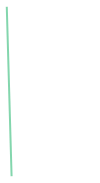

In [447]:
df_pipe.iloc[241]['geometry']

In [440]:
df_manhole[df_manhole['UCSD_ID']=='C7M024']['geometry'][0].distance(df_pipe[df_pipe['UCSD_ID']=='S01222']['geometry'][0])

0.0

defaultdict(set,
            {(6258198.488400668,
              1900145.8768579215): {(6258125.227392346, 1900113.9868298322)},
             (6258151.93239142,
              1899927.5544599295): {(6258148.384170175, 1899833.278729841)},
             (6258109.673289597,
              1899935.3621870875): {(6258101.248109594, 1899772.0892196745)},
             (6258148.384170175,
              1899833.278729841): {(6258148.365797505, 1899738.8875144273)},
             (6258101.248109594,
              1899772.0892196745): {(6258148.365797505, 1899738.8875144273)},
             (6257772.18511942,
              1899411.261201173): {(6257807.037083834, 1899411.2546395063)},
             (6257772.238268927,
              1899429.1512572616): {(6257807.055128425, 1899429.1450236738)},
             (6258119.0121816695,
              1899328.7082166672): {(6258119.017102927, 1899328.6980460882)},
             (6258119.017102927,
              1899328.6980460882): {(6258246.32754384, 1899073.700

In [469]:
test_frame = df_incomplete[["ManholeID","Downstream from"]]
mistakes = set()
for manhole_id in test_frame["ManholeID"]:
    component_test = set()
    component_sewer = set()
    searchPotentialManHole(manhole_id,manhole_graph,component_test)
    if manhole_id in coords_manhole_map:
        searchSewer(coords_manhole_map[manhole_id],set(),component_sewer,correct_sewer_edges,manhole_coords_map)
    diff = component_test-component_sewer
    if len(diff) > 0:
        print("Cannot catch the elements",diff,manhole_id)
        mistakes.add((frozenset(diff),manhole_id))

In [470]:
mistakes

set()

In [492]:
flatten_set = set(list(correct_sewer_edges.keys())+[point for elem in list(correct_sewer_edges.values()) for point in elem])
len(set(flatten_set).intersection(set(manhole_coords)))
set(manhole_coords) - set(flatten_set).intersection(set(manhole_coords))



{(6253798.525415838, 1897334.4664702564),
 (6257412.283280179, 1903539.8224978447),
 (6259489.70825918, 1899317.2850111723)}

In [495]:
manhole_coords_map[(6253798.525415838, 1897334.4664702564)]

'S1M053'

In [459]:
len(set(correct_sewer_edges).intersection(set(manhole_coords)))

617

In [460]:
len(set(manhole_coords))

631

In [461]:
len(segment_set.intersection(set(manhole_coords)))

628

In [464]:
len(correct_sewer_edges),len(segment_set)

(4457, 4586)

In [496]:
def getSewerEdge(df_pipe):
    correct_sewer_edges = defaultdict(set)
    for index, row in df_pipe.iterrows():
        for idx in range(1,len(row['geometry'].coords)):
            correct_sewer_edges[row['geometry'].coords[idx-1]].add(row['geometry'].coords[idx])
    return correct_sewer_edges

In [498]:
def searchPotentialManHole(manhole_id,graph,pot_affected): #DFS get connected component
    if manhole_id in pot_affected or manhole_id not in graph: # if already visited or there is no entry in the ManholeID column
        return
    pot_affected.add(manhole_id)
    for node in graph[manhole_id]["to"]:
        searchPotentialManHole(node,graph,pot_affected)

In [497]:
def testModel(test_frame):
    mistakes = set()
    for manhole_id in test_frame["ManholeID"]:
        component_test = set()
        component_sewer = set()
        searchPotentialManHole(manhole_id,manhole_graph,component_test)
        if manhole_id in coords_manhole_map:
            searchSewer(coords_manhole_map[manhole_id],set(),component_sewer,correct_sewer_edges,manhole_coords_map)
        diff = component_test-component_sewer
        if len(diff) > 0:
            print("Cannot catch the elements",diff,manhole_id)
            mistakes.add((frozenset(diff),manhole_id))
    return mistakes

In [500]:
from collections import defaultdict
manhole_graph = defaultdict(dict)
for index, row in df_incomplete.iterrows():
    for elem in row["Downstream from"]:
        if elem != "":
            if elem not in manhole_graph:
                manhole_graph[elem]["to"] = set()
            manhole_graph[elem]["to"].add(row["ManholeID"])

In [508]:
def searchSewer(seg_loc,visited,res,sew_map,man_map):
    if seg_loc in visited: return
    visited.add(seg_loc)
    if seg_loc in man_map: res.add(man_map[seg_loc])
    for seg in sew_map[seg_loc]:
        searchSewer(seg,visited,res,sew_map,man_map)

In [510]:
def buildGraph(manhole_ids,df_pipe,coords_manhole_map,G_sewer_dict,manhole_coords_map):
    visited = set()
    graph = dict()
    for manhole_id in manhole_ids:
        if manhole_id not in visited:
            visited.add(manhole_id)
            component_sewer = set()
            searchSewer(coords_manhole_map[manhole_id],set(),component_sewer,G_sewer_dict,manhole_coords_map)
            graph[manhole_id] = component_sewer
    return graph
    

In [513]:
geo_map = buildGraph(df_manhole['UCSD_ID'],df_pipe,coords_manhole_map,correct_sewer_edges,manhole_coords_map)

In [543]:
geo_map['C6M020']

{'C6M001',
 'C6M002',
 'C6M003',
 'C6M005',
 'C6M006',
 'C6M014',
 'C6M020',
 'C6M021',
 'C6M022',
 'C6M023',
 'C6M081',
 'C6M082'}

In [541]:
geo_map['C6M001']

{'C6M001'}

In [517]:
manhole_downstream.head()

,OBJECTID,UCSD_ID,TYPE,IE,SDRSD,INSTALL_DA,AS_BUILT,LOCATION,MAINT_BY,MAINT_DATE,INFO_SOURC,PIC_SURVEY,NOTES,created_us,created_da,last_edite,last_edi_1,GLOBALID,geometry
0,1,C3M073,4' x 3' Manhole,0.0,SDS-107,1978-11-03,https://facilities.ucsd.edu/Drawings/home/shee...,HILLSIDE,NA,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{8A132BDD-1C1B-4D3F-B114-0F1AB76844F5},POINT (6260385.85344851 1900673.053296998)
1,2,C2M029,4' x 3' Manhole,0.0,BIOMEDICAL FACILITY II C5.01,2010-12-01,BIO MEDICIAL RESEARCH PH2 C3. 01,Biomedical Research Facility II,NA,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{5A7349A9-9684-42CA-A5E3-4217B5FA5A3C},POINT (6259334.251549095 1899321.881130591)
2,3,C2M032,4' x 3' Manhole,0.0,BIOMEDICAL FACILITY II C5.01,2010-12-01,BIO MEDICIAL RESEARCH PH2 C3. 01,Biomedical Research Facility II,NA,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{41B1206B-14C8-4C60-A57E-78B00BE185CE},POINT (6259141.41400826 1899150.964805752)
3,4,C2M031,4' x 3' Manhole,0.0,BIOMEDICAL FACILITY II C5.01,2010-12-01,BIO MEDICIAL RESEARCH PH2 C3. 01,Biomedical Research Facility II,NA,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{8A6BD0F6-A50B-445B-9587-1D2132DFCFF1},POINT (6259292.360884845 1899150.780094832)
4,5,C2M030,4' x 3' Manhole,0.0,BIOMEDICAL FACILITY II C5.01,2010-12-01,BIO MEDICIAL RESEARCH PH2 C3. 01,Biomedical Research Facility II,NA,None,None,N/A,N/A,None,None,AINCIONG,2016-10-13,{45359A17-A3E2-47B8-A37E-99D0DDF60041},POINT (6259291.574141011 1899250.81631209)


In [519]:
manhole_downstream = df_manhole.copy()
manhole_downstream['Downstream_to'] = manhole_downstream["UCSD_ID"].apply(lambda x: geo_map[x])

In [521]:
manhole_downstream[['UCSD_ID','Downstream_to']]

,UCSD_ID,Downstream_to
0,C3M073,"{C1M088, C3M239, C3M237, C3M073, C3M262, C2M01..."
1,C2M029,"{C2M003B, C5M004, C2M010, C2M001, C2M028, C1M0..."
2,C2M032,"{C2M001, C1M088, C3M239, C3M237, C2M003B, C5M0..."
3,C2M031,"{C2M001, C1M088, C3M239, C3M237, C2M003B, C5M0..."
4,C2M030,"{C2M001, C1M088, C3M239, C3M237, C2M003B, C5M0..."
5,C2M028,"{C2M003B, C5M004, C2M010, C2M001, C2M028, C1M0..."
6,C8M003,{C8M003}
7,S1M048,"{S1M050, S1M048, S1M049, S1M052, S1M051, S1M040}"
8,S1M053,{S1M053}
9,S1M042,"{S1M031, S1M042}"


In [540]:
manhole_downstream[['UCSD_ID','Downstream_to']].to_csv('downstream_graph.csv',index=False)

In [522]:
len(manhole_downstream['UCSD_ID'])

631

In [526]:
manhole_downstream[manhole_downstream['UCSD_ID']=='S1M053'][['UCSD_ID','Downstream_to']]

,UCSD_ID,Downstream_to
8,S1M053,{S1M053}
